Importing Libraries

In [1]:
import tensorflow as tf
import pandas as pd 
from tensorflow.keras.utils import to_categorical
import random
import numpy as np
import os, splitfolders
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from glob import glob

Spliting the dataset into Training & Testing

In [ ]:
#Spliting the dataset into Training and Testing
#20% Testing & 80% Training Data
splitfolders.ratio('D:\Salman\Tomato_Dataset\PlantVillage', output="D:\Salman\Tomato_Dataset\PlantVillage\Test_&_Train", seed=1337, ratio=(0.8, 0.2))
#Once run then comment it or don't run

Creating ImageDataGenerator for Training & Testing datsets

In [ ]:
#If we have seperate Dataset for Training and Testing
traindatadirectory = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=20, fill_mode='nearest',featurewise_center =True, featurewise_std_normalization = True)
traindata = traindatadirectory.flow_from_directory(directory="D:/Salman/Tomato_Dataset/PlantVillage/Test_&_Train/train",
                                       target_size=(224,224),
                                       batch_size=32,
                                       class_mode='categorical',
                                       shuffle=True)


testdatadirectory = ImageDataGenerator(rescale=1./255)
testdata = testdatadirectory.flow_from_directory(directory="D:/Salman/Tomato_Dataset/PlantVillage/Test_&_Train/val",
                                      target_size=(224,224),
                                      batch_size=32,
                                      class_mode='categorical',
                                      shuffle=True)


Modifying the inceptionv3 model

In [23]:
inception = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)

In [ ]:
# Folders in the Training Set
folders = glob('D:/Salman/Tomato_Dataset/PlantVillage/Test_&_Train/train/*')
print(folders)

In [ ]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

In [27]:
model.compile(
  loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']
)

In [ ]:
# fit the model, it will take 1620minutes & 16.2seconds time to execute
model_fit = model.fit(
  x=traindata,
  validation_data=testdata,
  epochs=10,
  steps_per_epoch=len(traindata),
  validation_steps=len(testdata)
)

Accuracy & Loss Graphs

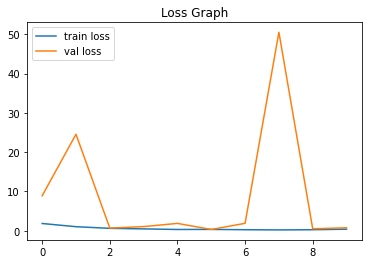

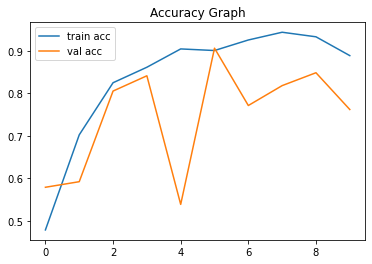

In [20]:
#Loss
plt.title('Loss Graph')
plt.plot(model_fit.history['loss'], label='train loss')
plt.plot(model_fit.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# Accuracy
plt.title('Accuracy Graph')
plt.plot(model_fit.history['accuracy'], label='train acc')
plt.plot(model_fit.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

Saving the model

In [21]:
#Saving the model
model.save('model_inception.h5')